# Supervised Learning with Decision Trees: Breast Cancer Dataset

In this document, we will demonstrate how to build, evaluate, and optimize a Decision Tree classifier using the Breast Cancer Wisconsin dataset. We will use Python with scikit-learn for the machine learning tasks and Seaborn for advanced plotting. This dataset is more realistic than traditional toy datasets and provides insights into a critical real-world application.

## 1. Setting Up the Environment

Jupyter Notebook provides an interactive environment for data exploration. Scikit-learn offers powerful machine learning tools, and Seaborn enables attractive, advanced visualizations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set plotting styles and figure sizes
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Loading the Dataset

We are using the Breast Cancer Wisconsin dataset, which contains 569 samples of breast cancer cases. Each sample includes 30 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The target variable indicates whether the tumor is malignant or benign.

In [2]:
# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()

# Display dataset keys and feature/target names
print("Dataset keys:", cancer.keys())
print("Feature names:", cancer.feature_names)
print("Target names:", cancer.target_names)

# Create a DataFrame for a quick look at the dataset
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)
print("\nFirst five rows of the dataset:")
df_cancer.head()

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']

First five rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## 3. Preprocessing

We split the dataset into training and testing sets. Although this dataset is already preprocessed, many real-world scenarios require additional cleaning steps. Here, we simply perform an 80/20 train-test split.

In [3]:
# Define features (X) and target (y)
X = cancer.data
y = cancer.target

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 455 samples
Testing set size: 114 samples


## 4. Training the Decision Tree

We now create and train a Decision Tree classifier. Key parameters include:

- **max_depth:** Limits the maximum depth of the tree to help prevent overfitting.
- **min_samples_split:** The minimum number of samples required to split an internal node.

We will use a relatively shallow tree (e.g., `max_depth=3`) to maintain interpretability.

In [4]:
# Initialize the Decision Tree Classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


## 5. Visualizing the Decision Tree

Visualizing the decision tree helps us understand the decision rules, node impurity, sample counts, and predicted classes at each node.

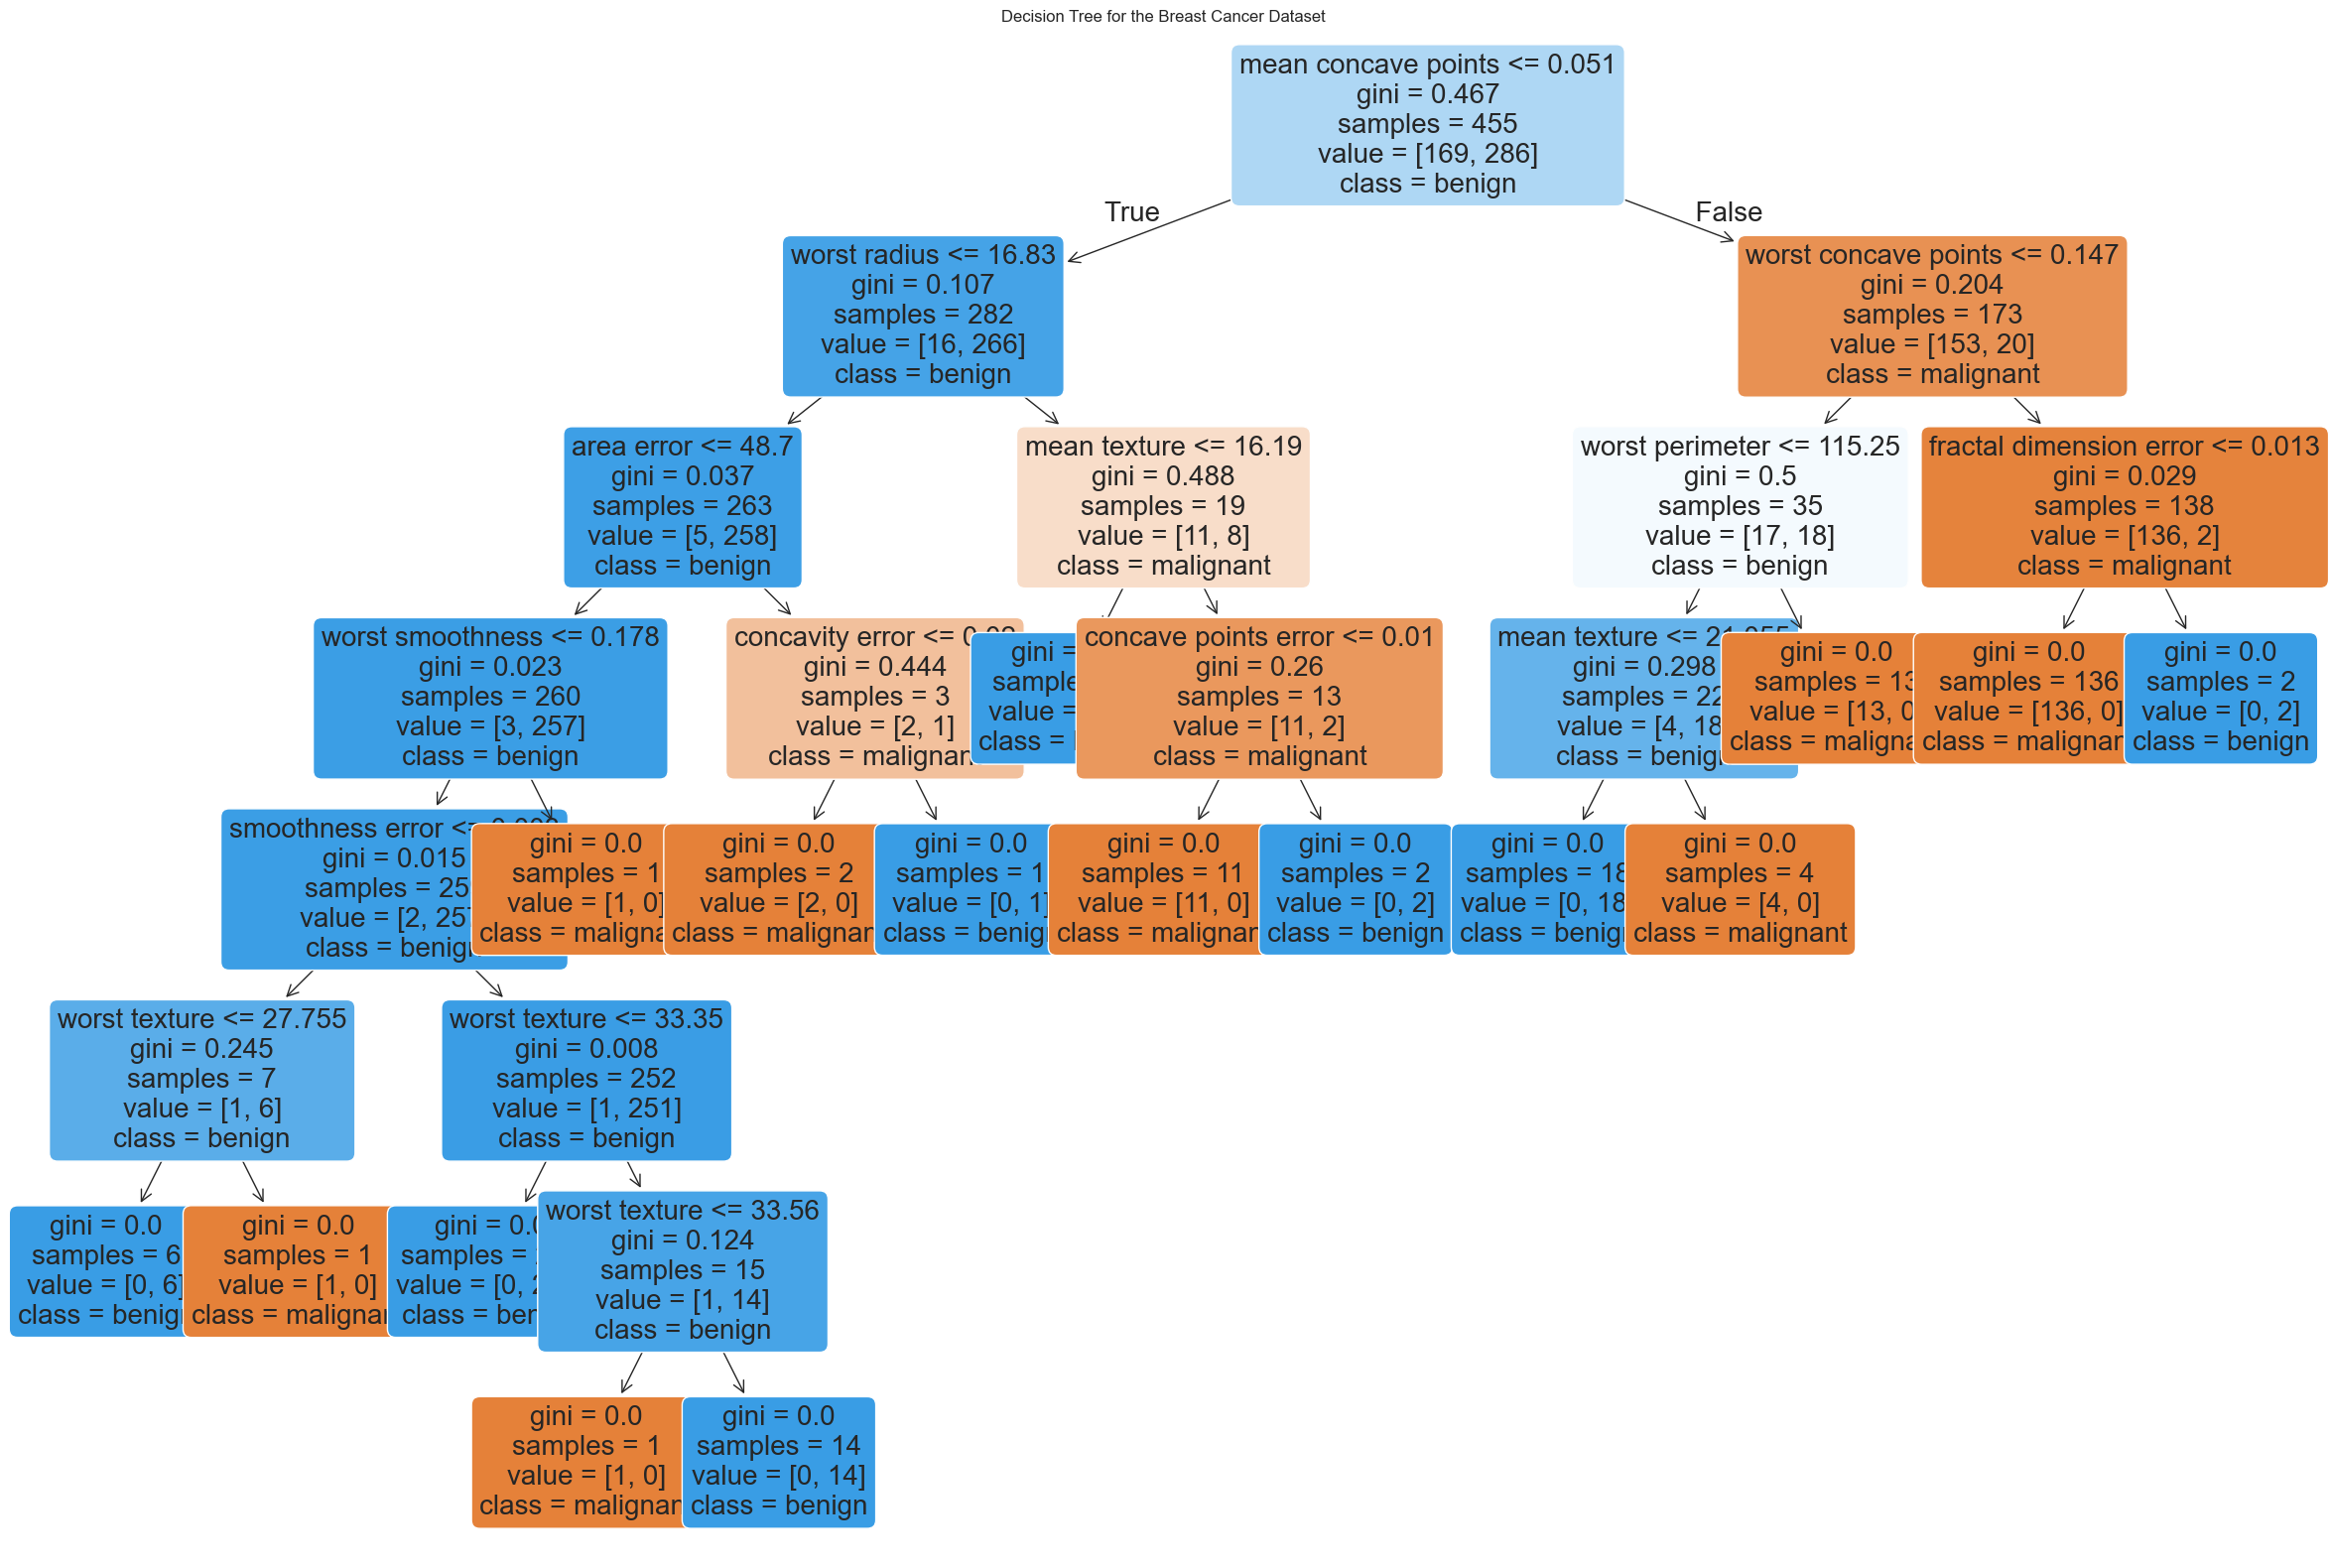

In [5]:
plt.figure(figsize=(30, 20))
plot_tree(clf,
          feature_names=cancer.feature_names,
          class_names=cancer.target_names,
          filled=True,
          rounded=True,
          fontsize=20)
plt.title("Decision Tree for the Breast Cancer Dataset")
plt.show()

## 6. Evaluating the Model with Additional Classification Metrics

We evaluate our model using several metrics:

- **Accuracy:** The proportion of correct predictions.
- **Classification Report:** Precision, recall, and F1-score for each class.
- **Confusion Matrix:** A detailed summary of prediction performance.

Seaborn is used to generate an advanced heatmap of the confusion matrix.

Accuracy on the test set: 0.95

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
[[40  3]
 [ 3 68]]


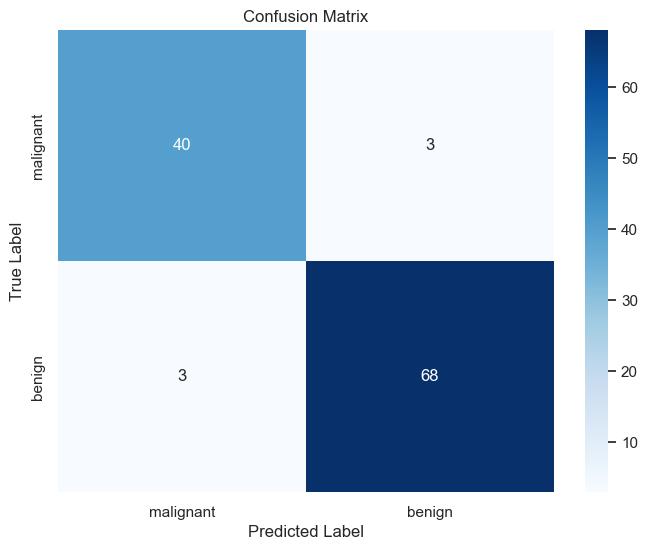

In [6]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Generate a Classification Report (includes precision, recall, and F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 7. Hyperparameter Optimization using Grid Search

We now use `GridSearchCV` to search for the best hyperparameters for the Decision Tree classifier. The grid includes:

- **max_depth:** Maximum depth of the tree.
- **min_samples_split:** Minimum number of samples required to split an internal node.
- **criterion:** Function to measure the quality of a split (either "gini" or "entropy").

In [7]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding accuracy
print("Best Parameters found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters found:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.95


### 8. Train the Optimized Model and Evaluate

Using the best parameters from GridSearchCV, we retrain the model and evaluate its performance on the test set.


Optimized Model Accuracy on the test set: 0.96

Optimized Model Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Optimized Model Confusion Matrix:
[[39  4]
 [ 1 70]]


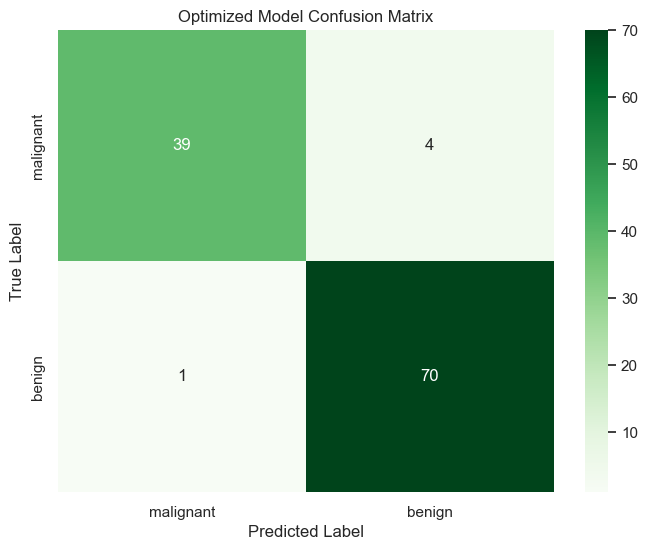

In [8]:
# Retrieve the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Train the optimized model on the training data
best_clf.fit(X_train, y_train)

# Make predictions with the optimized model on the test set
y_pred_optimized = best_clf.predict(X_test)

# Calculate the accuracy of the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"\nOptimized Model Accuracy on the test set: {accuracy_optimized:.2f}")

# Generate a Classification Report for the optimized model
print("\nOptimized Model Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=cancer.target_names))

# Compute and print the Confusion Matrix for the optimized model
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
print("Optimized Model Confusion Matrix:")
print(cm_optimized)

# Visualize the Optimized Model's Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap="Greens",
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Optimized Model Confusion Matrix")
plt.show()

## 9. Feature Importance

Understanding which features are driving the predictions in our model provides valuable insights into the data and the model's behavior. The Decision Tree classifier computes an importance value for each feature based on how much each feature reduces impurity across the tree. Let's extract and visualize these importances.


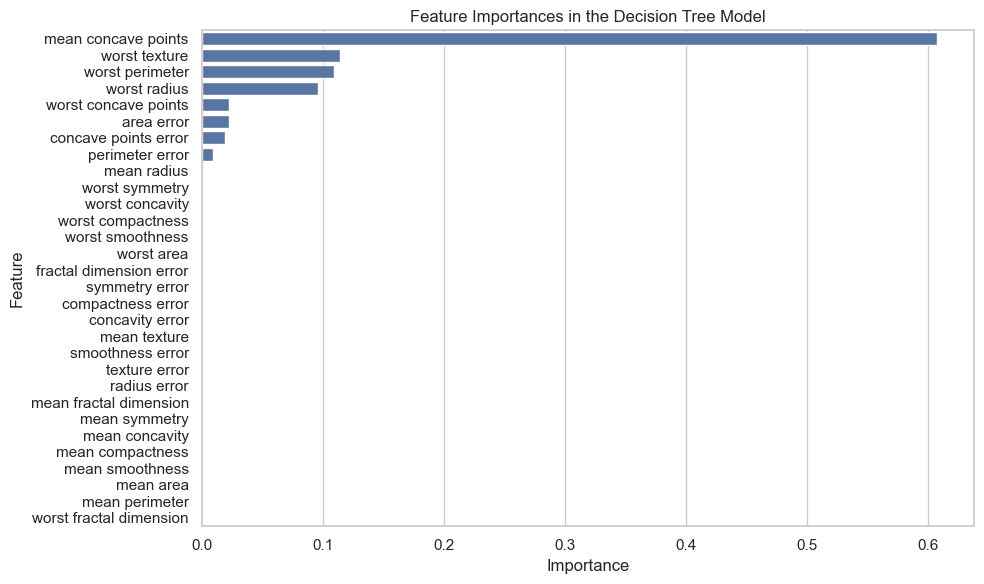

In [9]:
# Get feature importances from the optimized model (best_clf)
importances = best_clf.feature_importances_
features = cancer.feature_names

# Create a DataFrame for visualization and sort by importance
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title("Feature Importances in the Decision Tree Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## 10. Wrap-Up and Recap

**Key Takeaways:**

- **Supervised Learning:** We learn a mapping from inputs (features) to outputs (labels) using labeled data.
- **Decision Trees:**
  - Comprised of nodes (decision points), branches (paths), and leaves (final predictions).
  - They provide interpretability but can be prone to overfitting.
- **Model Evaluation:** Accuracy, precision, recall, F1-score, and confusion matrices offer a comprehensive evaluation of model performance.
- **Hyperparameter Optimization:** GridSearchCV helps identify the best parameters for enhanced model performance.
- **Advanced Plotting:** Seaborn enables the creation of attractive, informative visualizations (such as confusion matrix heatmaps).

Feel free to modify the code and explore further.

In [10]:
type(cancer)

sklearn.utils._bunch.Bunch